In [1]:
# Expand the notebook width to use more of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

# An Evening of Python coding: Introduction to spaCy

### Eric Kelly (cardinal-innovations.com)

### April 21, 2020

# Installation

https://spacy.io/usage

Go to the link and choose your options, then just run the commands that were generated.

For my linux machine, I made a conda environment, activated the environment, and then installed spacy and the English model in that environment.  My options look like this:

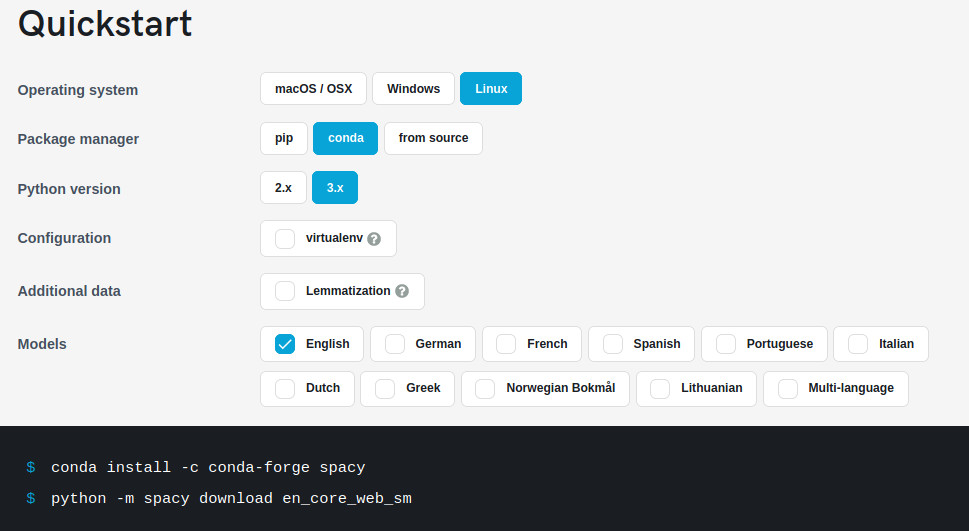

# spaCy is a Python library for Natural Language Processing

If you have a bunch of unstructured text, like the text from a book or an article, you can apply NLP techniques to convert the text into a structured format suitable for analysis with code.

NLP can help in understanding the meaning of the whole text, the relationships between entities in the text, and so on.

Examples:
* Summarize a book
* Find the subject of an article
* Extract specific entities or values

### spaCy was designed to be fast and easy

Other NLP tools: NLTK, CoreNLP, TextBlob (NLTK), scikit-learn, ...

# Let's start using spaCy as we learn the concepts

1. import the library
2. load an English model
3. create a document container from some text

### Simple sentence: "I love coffee"

In [2]:
import spacy

# Instantiate an English model (try "en" if model does not load)
nlp = spacy.load('en_core_web_sm')

# Pass the text to the model to create a doc container
doc = nlp('i love coffee')

### Some NLP concepts and how spaCy handles them

#### Tokenization

Text needs to be tokenized, and spaCy does this for us.  Tokenization is a segmentation step...
> _"Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens."_

(words, sentences, punctuation, etc.)

https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html

### "I love coffee"

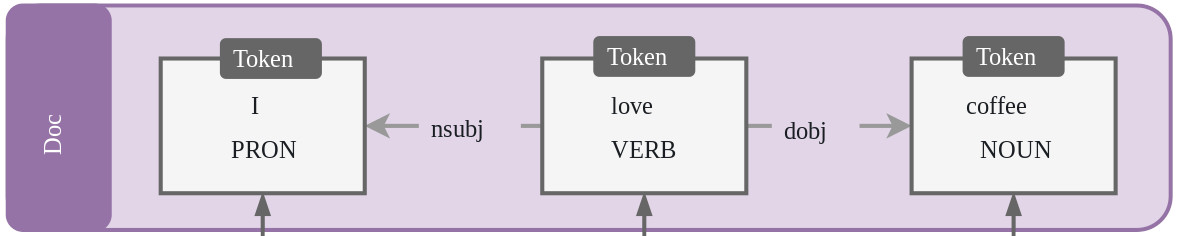

#### spaCy likes to be helpful...

In [3]:
spacy.explain('nsubj')

'nominal subject'

List of annotation descriptions and reference links to original sources (Universal Dependencies scheme, OntoNotes):
https://spacy.io/api/annotation

#### Part of speech (POS)

POS is a category for words that play similar roles

POS list for English: noun, verb, adjective, adverb, pronoun, preposition, conjunction, interjection, numeral, article, determiner

https://en.wikipedia.org/wiki/Part_of_speech

#### Syntactic dependency (DEP)

DEP gives the relationship between tokens

"I" is the _nominal subject_ and "coffee" is the _direct object_.  They are connected by the _root_ "love".

#### Let's visualize the tokens using displaCy

To plot a dependency tree with displaCy, we will also need to 

In [4]:
from spacy import displacy

# Outside of jupyter, use displacy.serve()
displacy.render(doc, style='dep')

#### spaCy likes to be helpful...

If you do something wrong, you might see a helpful error message.  In this case, if you try to plot the dependency tree in the style of entities for a sentence that has no entities, you'll get this error message.

In [5]:
displacy.render(doc, style='ent')

/home/eric/miniconda3/envs/spacy/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


In [6]:
doc.ents

()

Let's try a sentence that contains entities instead.

In [7]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')

In [8]:
displacy.render(doc, style='dep')

In [9]:
displacy.render(doc, style='ent')

### Access the attributes of tokens

The tokens can be accessed by iterating over the doc object.

In [10]:
print(doc[0])
print(doc[0].text)

Apple
Apple


In [11]:
for token in doc:
    print(token)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


In [12]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


In [13]:
print(f'{"text":<10} {"part of speech":<15} {"description":<15} {"dependency":<15} {"description":<30} {"lemma":<20} {"is stop":<10}')

for token in doc:
    print(f'{token.text:<10} {token.pos_:<15} {str(spacy.explain(token.pos_)):<15} {token.dep_:<15} {str(spacy.explain(token.dep_)):<30} {token.lemma_:<20} {token.is_stop:<10}')

text       part of speech  description     dependency      description                    lemma                is stop   
Apple      PROPN           proper noun     nsubj           nominal subject                Apple                0         
is         AUX             auxiliary       aux             auxiliary                      be                   1         
looking    VERB            verb            ROOT            None                           look                 0         
at         ADP             adposition      prep            prepositional modifier         at                   1         
buying     VERB            verb            pcomp           complement of preposition      buy                  0         
U.K.       PROPN           proper noun     compound        compound                       U.K.                 0         
startup    NOUN            noun            dobj            direct object                  startup              0         
for        ADP          

#### Lemma

Lemma is the root or base of a group of words.

Example: "be" is the base of "am", "are", and "is"

The goal is to remove tense and other variations of the word and represent it in a common or standard form, which may improve analysis.

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html#2378

#### Stop Word

Stop words are the common words that are sometimes removed from the text before analysis.  You can choose to remove them or not.  You can also add or remove stop words from spaCy's list of stop words if that is helpful to your analysis.  spaCy's default is to remove a list of stop words (labeled 1 above).  spaCy's default list of stop words is here: https://github.com/explosion/spaCy/blob/master/spacy/lang/en/stop_words.py

https://en.wikipedia.org/wiki/Stop_words

https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html

To see the stop words, use `nlp.Defaults.stop_words`

In [14]:
print(nlp.Defaults.stop_words)

# If you want to change the list, use the following methods, 
# but note that you will need to save your model and reload it in the future.
# https://spacy.io/usage/v2#migrating-saving-loading

# nlp.Defaults.stop_words.add("across")
# nlp.Defaults.stop_words.remove("above")

{'one', 'across', 'latterly', 'there', 'same', 'before', 'full', 'off', 'ours', 'was', 'however', 'who', 'while', 'mine', 'whereafter', 'wherein', 'been', 'everywhere', 'elsewhere', 'give', 'they', 'without', 'last', 'for', 'seemed', 'anyone', 'those', 'ten', 'four', 'anyway', 'thence', 'yours', 'a', 'fifteen', 'together', 'where', 'hers', 'move', 'why', '’re', 'only', 'twelve', 'noone', 'whose', 'onto', 'this', 'were', 'enough', 'ever', 'amount', 'might', 'no', 'although', 'otherwise', 'ourselves', 'over', 'your', 'whence', 'n’t', 'seem', 'because', 'others', 'nor', 'first', 'which', 'would', 'rather', 'alone', 'is', 'namely', 'his', 'do', 'never', 'other', 'throughout', 'yourself', '‘ve', 'not', 'hereafter', 'everything', 'perhaps', 'almost', 'hundred', 'just', 'very', 'anything', 'yet', 'beyond', 'from', 'meanwhile', 'hereby', 'moreover', 'using', 'much', 'more', 'or', 'since', '’m', 'at', 'with', 'himself', 'now', 'by', 'quite', 'within', 'several', 'forty', 'must', 'through', 'aft

# Save or Load your Model

If the default model works for you, there is no need to save it.  However, if you have modified the model, be sure to save it and reload it next time you analyze similar text.

Save the model

```python
some_dir = '/path/to/directory' 
nlp.to_disk(some_dir)
```

Load the model

```python
nlp = spacy.load(some_dir)
```

# Examine an Article and find Named Entities

Source: https://www.techinasia.com/yellow-messenger-banks-20m

Let's use a larger model ('en_core_web_lg') to help interpret the article.

In [15]:
with open('yellow.txt', 'r') as ft:
    text = ft.read()

In [16]:
nlp = spacy.load('en_core_web_lg')

In [17]:
doc = nlp(text)
print(doc)

Global demand for conversational AI systems has become urgent and vast. According to research from advisory firm Gartner, one in every three companies worldwide has already integrated the technology into their operations.

India-based Yellow Messenger, a startup that provides businesses with an AI chatbot for customer engagement, said it has raised US$20 million in series B money to capture more of the growing market.

The new funding round, which was led by Lightspeed Venture Partners and Lightspeed India, bumps up the company’s total funding to US$24 million, according to a statement.

Yellow Messenger looks to use the fresh capital to fuel international growth across Latin America and Asia Pacific, as well as new regions such as the US and Europe.

In addition, it plans to invest further in product innovation, which includes improving its bot’s multilingual voice capabilities and expanding enterprise integrations. Currently, its chatbots are available in over 120 languages, includin

### Print the sentences

In [18]:
for sent in doc.sents:
    print(sent)

Global demand for conversational AI systems has become urgent and vast.
According to research from advisory firm Gartner, one in every three companies worldwide has already integrated the technology into their operations.


India-based Yellow Messenger, a startup that provides businesses with an AI chatbot for customer engagement, said it has raised US$20 million in series B money to capture more of the growing market.


The new funding round, which was led by Lightspeed Venture Partners and Lightspeed India, bumps up the company’s total funding to US$24 million, according to a statement.


Yellow Messenger looks to use the fresh capital to fuel international growth across Latin America and Asia Pacific, as well as new regions such as the US and Europe.


In addition, it plans to invest further in product innovation, which includes improving its bot’s multilingual voice capabilities and expanding enterprise integrations.
Currently, its chatbots are available in over 120 languages, incl

In [19]:
sents_l = list(doc.sents)
print(sents_l[0])
print(sents_l[0][0])
print(sents_l[0][0].pos_)

Global demand for conversational AI systems has become urgent and vast.
Global
ADJ


### Visualize the entities in the article

In [20]:
displacy.render(doc, style='ent')

### Entity descriptions

In [21]:
print(f'{"entity":<50} {"label":<10} description')
for ent in doc.ents:
    print(f'{ent.text:<50} {ent.label_:<10} {spacy.explain(ent.label_)}')

entity                                             label      description
Gartner                                            ORG        Companies, agencies, institutions, etc.
three                                              CARDINAL   Numerals that do not fall under another type
India                                              GPE        Countries, cities, states
Yellow Messenger                                   PRODUCT    Objects, vehicles, foods, etc. (not services)
US$20 million                                      MONEY      Monetary values, including unit
Lightspeed Venture Partners                        ORG        Companies, agencies, institutions, etc.
Lightspeed India                                   ORG        Companies, agencies, institutions, etc.
US$24 million                                      MONEY      Monetary values, including unit
Yellow Messenger                                   PRODUCT    Objects, vehicles, foods, etc. (not services)
Latin America        

# Improve the model

One of several options: start with pretrained model and continue training with new data specific to the project.  This will push the model in the direction that helps the predictions without the need to make a huge training dataset.

#### spaCy likes to be helpful...

See step-by-step guides and code examples here: https://spacy.io/usage/training

More examples and code snippets: https://spacy.io/usage/spacy-101#lightning-tour

https://spacy.io/usage/training#example-train-ner

In [22]:
import random
from pathlib import Path
from spacy.util import minibatch, compounding


# training data
TRAIN_DATA = [
    ("Yellow Messenger is a startup in India that provides businesses with an AI chatbot.", {"entities": [(0, 16, "ORG"), (33, 38, "GPE")]}),
    ("The co-founder of Yellow Messenger said some things.", {"entities": [(18, 33, "ORG")]}),
    ("Facebook developed the service Facebook Messenger.", {"entities": [(0, 8, "ORG"), (31, 49, "PRODUCT")]})
]


def train_ner(model=None, output_dir=None, n_iter=100):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")

    # add labels
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # reset and initialize the weights randomly – but only if we're
        # training a new model
        if model is None:
            nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,  # dropout - make it harder to memorise data
                    losses=losses,
                )
            print("Losses", losses)

    # test the trained model
    for text, _ in TRAIN_DATA:
        doc = nlp(text)
        print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
        print("Tokens", [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)


new_model_dir = '/home/eric/tutorial/ner_model'
train_ner(model='en_core_web_lg', output_dir=new_model_dir, n_iter=100)

Loaded model 'en_core_web_lg'
Losses {'ner': 8.91913943234249}
Losses {'ner': 7.0709610402118415}
Losses {'ner': 5.563955172896385}
Losses {'ner': 9.104412576125469}
Losses {'ner': 6.276603070204146}
Losses {'ner': 9.00862304866314}
Losses {'ner': 7.667048878967762}
Losses {'ner': 13.0582195520401}
Losses {'ner': 8.07830883807037}
Losses {'ner': 7.861035145819187}
Losses {'ner': 11.890740185976028}
Losses {'ner': 5.64701507834252}
Losses {'ner': 10.902987136738375}
Losses {'ner': 5.784379348158836}
Losses {'ner': 3.8216730568383355}
Losses {'ner': 10.013163544237614}
Losses {'ner': 9.586127533315448}
Losses {'ner': 8.708938151597977}
Losses {'ner': 7.136060230433941}
Losses {'ner': 8.961351979523897}
Losses {'ner': 3.208182624541223}
Losses {'ner': 2.3627108896907885}
Losses {'ner': 5.693095792084932}
Losses {'ner': 4.362483498931397}
Losses {'ner': 7.424255613237619}
Losses {'ner': 1.935247456189245}
Losses {'ner': 2.2602696262765676}
Losses {'ner': 3.163388845976442}
Losses {'ner': 2

In [23]:
with open('yellow.txt', 'r') as ft:
    text = ft.read()

nlp = spacy.load(new_model_dir)

doc = nlp(text)

displacy.render(doc, style='ent')

# Results

The training helped the model correctly identify Yellow Messenger as a company, and Facebook Messenger is correctly labeled as a product.  As with any data science project, your model should be tuned for the task.  Other ways to improve the results include defining rules that spaCy would use to handle something like labeling Yellow Messenger.  This might be best if your retrained model begins to fail on other labeling that was previously working well.  In other words, don't retrain the model, just make a rule for Yellow Messenger.